# Importation des librairies etde la base de données

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as sts
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Models librairies
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
#Metrics Librairies
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Normalize values
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [156]:
df1=pd.read_csv("/content/drive/MyDrive/energy_batiment.csv")
df1=df1.iloc[:, 1:]

In [157]:
l=list(df1.columns)
l=[i for i in l if i!='ENERGYSTARScore']
df=df1[l]
df.shape, df1.shape

((978, 18), (978, 19))

# Encodage des variables

In [158]:
#Les targets
targets = ["SiteEnergyUse(kBtu)", "TotalGHGEmissions"]

quan1=[col for col in df1.columns if df1[col].dtypes in ['float64', 'int64']]
quan1=[col for col in quan1 if col not in targets]
qual=[col for col in df1.columns if df1[col].dtypes=='object']
len(quan1), len(qual), df1.shape

(12, 5, (978, 19))

In [159]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, quan1),
        ("cat", categorical_transformer, qual),
    ]
)

In [160]:
quan=[i for i in quan1 if i!="ENERGYSTARScore"]
preprocessor1 = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, quan),
        ("cat", categorical_transformer, qual),
    ]
)
len(quan)

11

In [161]:
#Liste total erreur dans laquelle on va ajouter les erreurs totales et en faire un graphe finale
dic_tot={}

# Normalisation par log

In [162]:
for i in quan:
  df[i]=df[i].replace([np.inf, -np.inf], 0)
  df[i]=df[i].apply(lambda x: round(x, 3))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [163]:
for j in quan1:
  df1[j]=df1[j].replace([np.inf, -np.inf], 0)
  df1[j]=df1[j].apply(lambda x: round(x, 3))

In [164]:
for i in quan:
  df[i]=df[i].apply(lambda x: x if x>0 else 1)
  df[i]=df[i].apply(lambda x: np.log(x))
for j in quan1:
  df1[j]=df1[j].apply(lambda x: x if x>0 else 1)
  df1[j]=df1[j].apply(lambda x: np.log(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [165]:
def clean_dataset(dfi):
    assert isinstance(dfi, pd.DataFrame), "df needs to be a pd.DataFrame"
    dfi.dropna(inplace=True)
    indices_to_keep = ~dfi.isin([np.nan, np.inf, -np.inf]).any(1)
    return dfi[indices_to_keep].astype(np.float64)
df[quan]=clean_dataset(df[quan])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [166]:
df1.describe()

,ZipCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,ENERGYSTARScore,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions
count,978.000000,978.000000,978.0,978.000000,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000
mean,11.493912,3.863180,0.0,3.708743,1.106676,11.156180,3.910883,4.838483,8.514099e+06,-0.388801,-2.485188,-2.244773,0.693147,179.638865
std,0.000187,0.000982,0.0,0.839066,0.938432,0.992278,0.930999,0.798267,2.193710e+07,1.442816,3.158439,3.075290,0.000000,686.832009
min,11.492927,3.860940,0.0,0.000000,0.000000,9.698920,0.000000,0.693147,7.971180e+04,-6.907755,-6.907755,-6.907755,0.693147,-0.800000
25%,11.493783,3.862670,0.0,3.332205,0.000000,10.360176,3.784190,4.395991,1.267853e+06,0.000000,-6.214608,-6.214608,0.693147,20.207500
50%,11.493834,3.863106,0.0,3.881511,1.098612,10.895395,4.248495,4.924351,2.829813e+06,0.000000,0.000000,0.000000,0.693147,49.735000
75%,11.493967,3.863862,0.0,4.369448,1.609438,11.756303,4.477337,5.292928,7.725746e+06,0.000000,0.000000,0.000000,0.693147,142.280000
max,11.494751,3.865644,0.0,4.753590,4.595120,14.484478,4.605170,7.870930,2.930908e+08,0.000000,0.000000,0.000000,0.693147,12307.160000


In [167]:
def clean_dataset(dfi):
    assert isinstance(dfi, pd.DataFrame)
    dfi.dropna(inplace=True)
    indices_to_keep = ~dfi.isin([np.nan, np.inf, -np.inf]).any(1)
    return dfi[indices_to_keep].astype(np.float64)
    
df1[quan1]=clean_dataset(df1[quan1])

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [168]:

X1=df[[i for i in df.columns if i not in targets]]#.apply(lambda x: str(x)).values
y1=df["SiteEnergyUse(kBtu)"].values
X_train1, X_test1, y_train1, y_test1=train_test_split(X1, y1, test_size=0.2)

In [169]:
colonnes=[i for i in df1.columns if i not in targets]
X=df1[colonnes]#.apply(lambda x: str(x)).values
y=df1["SiteEnergyUse(kBtu)"].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)

In [170]:
df.describe()

,ZipCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions
count,978.000000,978.000000,978.0,978.000000,978.000000,978.000000,978.000000,9.780000e+02,978.000000,978.000000,978.000000,978.000000,978.000000
mean,11.493912,3.863180,0.0,3.708743,1.106676,11.156180,4.838483,8.514099e+06,-0.388801,-2.485188,-2.244773,0.693147,179.638865
std,0.000187,0.000982,0.0,0.839066,0.938432,0.992278,0.798267,2.193710e+07,1.442816,3.158439,3.075290,0.000000,686.832009
min,11.492927,3.860940,0.0,0.000000,0.000000,9.698920,0.693147,7.971180e+04,-6.907755,-6.907755,-6.907755,0.693147,-0.800000
25%,11.493783,3.862670,0.0,3.332205,0.000000,10.360176,4.395991,1.267853e+06,0.000000,-6.214608,-6.214608,0.693147,20.207500
50%,11.493834,3.863106,0.0,3.881511,1.098612,10.895395,4.924351,2.829813e+06,0.000000,0.000000,0.000000,0.693147,49.735000
75%,11.493967,3.863862,0.0,4.369448,1.609438,11.756303,5.292928,7.725746e+06,0.000000,0.000000,0.000000,0.693147,142.280000
max,11.494751,3.865644,0.0,4.753590,4.595120,14.484478,7.870930,2.930908e+08,0.000000,0.000000,0.000000,0.693147,12307.160000


# Modeles avec Grid SearchCv pour choix des meilleiurs parametres

Nous allons trouver les meilleurs parametres d'abord apres refaire la prediction

In [171]:
from sklearn import metrics
error_dic={'explained_variance':metrics.explained_variance_score,
'max_error':metrics.max_error, 

'neg_mean_absolute_error':metrics.mean_absolute_error,

'neg_mean_squared_error': metrics.mean_squared_error, 

'neg_root_mean_squared_error': metrics.mean_squared_error, 

#'neg_mean_squared_log_error':metrics.mean_squared_log_error, 

'neg_median_absolute_error':metrics.median_absolute_error, 

'r2': metrics.r2_score, 

#'neg_mean_poisson_deviance':metrics.mean_poisson_deviance,

#'neg_mean_gamma_deviance': metrics.mean_gamma_deviance, 

'neg_mean_absolute_percentage_error': metrics.mean_absolute_percentage_error, 

#'d2_absolute_error_score': metrics.d2_absolute_error_score,

#'d2_pinball_score': metrics.d2_pinball_score, 

#'d2_tweedie_score': metrics.d2_tweedie_score
}

In [172]:
def regression_model(pre, model, params):
  model1=make_pipeline(pre, model)
  model1=GridSearchCV(model1, param_grid=params, cv=5)#, scoring=score)
  model1.fit(X_train, y_train)
  y_pred=model1.predict(X_test)
  erreur1=np.sqrt(mean_squared_error(y_test, y_pred))
  erreur2=mean_absolute_error(y_test, y_pred)
  score=model1.score(X_test,y_test)
  
  print(f"RMSE: {erreur1}, \n MAE: {erreur2}")
  print(f"Moyenne des erreur: ", (erreur1+erreur2)/2)
  print(f"Score: {score}\n")

  liste=[err(y_test, y_pred)for err in error_dic.values()]
  print('erreur totale moyenne: ',np.log(np.mean(liste)), "\n")
  '''accuracy=accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')'''
  sns.displot(np.abs(y_test-y_pred), kde=True, bins=40)
  plt.show()
  print('\n')
  return model1

In [173]:
def regression_model1(pre, model, params):
  model1=make_pipeline(pre, model)
  model1=GridSearchCV(model1, param_grid=params, cv=5)#, scoring=score)
  model1.fit(X_train1, y_train1)
  y_pred=model1.predict(X_test1)
  erreur1=np.sqrt(mean_squared_error(y_test1, y_pred))
  erreur2=mean_absolute_error(y_test1, y_pred)
  score=model1.score(X_test1,y_test1)
  
  print(f"RMSE: {erreur1}, \n MAE: {erreur2}")
  print(f"Moyenne des erreur: ", (erreur1+erreur2)/2)
  print(f"Score: {score}\n")

  liste=[err(y_test1, y_pred) for err in error_dic.values()]
  print('erreur totale moyenne: ',np.log(np.mean(liste)), "\n")
  '''accuracy=accuracy_score(y_test, y_pred)
  print(f'Accuracy: {accuracy}')'''
  sns.displot(np.abs(y_test1-y_pred), kde=True, bins=40)
  plt.show()
  print('\n')
  return model1

## Models naifs

* Avec EnergyStarScore

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py", line 605, in fit
    "Constant target value has to be specified "
TypeError: Constant target value has to b

RMSE: 11509012.477145627, 
 MAE: 7658472.22567137
Moyenne des erreur:  9583742.351408498
Score: -0.00821346855752525

erreur totale moyenne:  31.130987903954004 



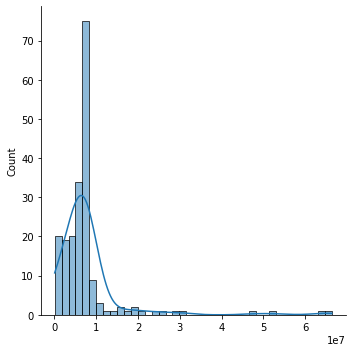



les meilleurs parametres du model: {'dummyregressor__strategy': 'mean'},
 meilleur score: -0.0027626874111213785


In [174]:
params={'dummyregressor__strategy':['mean', 'median', 'constant']}
pre=preprocessor
model0=regression_model(pre=pre, model=DummyRegressor(), params=params)
print(f"les meilleurs parametres du model: {model0.best_params_},\n meilleur score: {model0.best_score_}")

In [175]:
DummyRegressor().get_params().keys()

dict_keys(['constant', 'quantile', 'strategy'])

* Sans EnergyScore

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/dummy.py", line 605, in fit
    "Constant target value has to be specified "
TypeError: Constant target value has to b

RMSE: 23167427.38346557, 
 MAE: 9101801.907462534
Moyenne des erreur:  16134614.645464052
Score: -6.373863543118752e-05

erreur totale moyenne:  32.53022163351088 



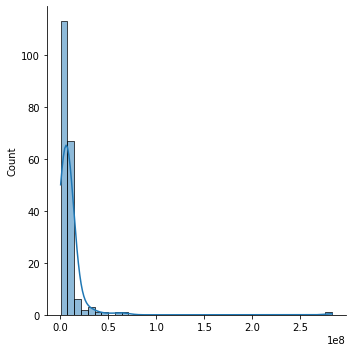



les meilleurs parametres du model: {'dummyregressor__strategy': 'mean'},
 meilleur score: -0.00371562912243979


In [176]:
params={'dummyregressor__strategy':['mean', 'median', 'constant']}
pre=preprocessor1
model0=regression_model1(pre=pre, model=DummyRegressor(), params=params)
print(f"les meilleurs parametres du model: {model0.best_params_},\n meilleur score: {model0.best_score_}")

* Le model DummyRegressor obtient de meilleurs resultats avec la variable 'EnergyStarScore'

## Modeles linéaires

### 1. Model Ridge

* Avec EnergyStarScore

RMSE: 8032594.143868182, 
 MAE: 6143870.137821731
Moyenne des erreur:  7088232.140844956
Score: 0.508879546274608

erreur totale moyenne:  30.41174216801627 



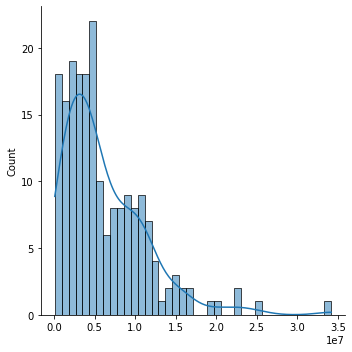



les meilleurs parametres du model: {'ridge__alpha': 13.257113655901108},
 meilleur score: 0.5593230153279489


In [177]:
params={'ridge__alpha': np.logspace(-5, 5, 50)}
scaler=preprocessor
model1=regression_model(pre=scaler, model=Ridge(), params=params)
print(f"les meilleurs parametres du model: {model1.best_params_},\n meilleur score: {model1.best_score_}")

* Sans EnergyStarScore

RMSE: 13888090.958239287, 
 MAE: 6279919.0419676015
Moyenne des erreur:  10084005.000103444
Score: 0.6406173026323243

erreur totale moyenne:  31.506790617763233 



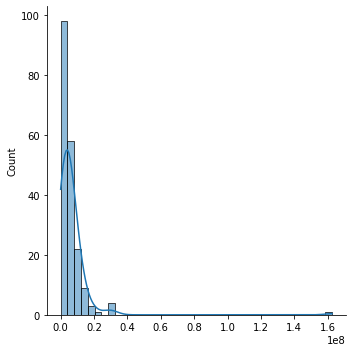



les meilleurs parametres du model: {'ridge__alpha': 5.1794746792312125},
 meilleur score: 0.5413281032776024


In [178]:
params={'ridge__alpha': np.logspace(-5, 5, 50)}
scaler=preprocessor1
model1=regression_model1(pre=scaler, model=Ridge(), params=params)
print(f"les meilleurs parametres du model: {model1.best_params_},\n meilleur score: {model1.best_score_}")

* Ridge Obtient aussi de meilleurs resultat avec EnergyStarScore

### 2.Model Lasso

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31528683314454.805, tolerance: 27062744383526.05
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45300167715155.48, tolerance: 41200939731534.79
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39211142183713.664, tolerance: 33122050549107.324
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 399867386

RMSE: 7010750.9725071, 
 MAE: 5029537.430323296
Moyenne des erreur:  6020144.201415198
Score: 0.6258847127965748

erreur totale moyenne:  30.139616885815833 



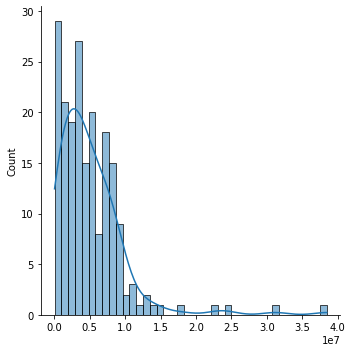



les meilleurs parametres du model: {'lasso__alpha': 117681.19524349991}
, meilleur score: 0.5849851635383713


In [179]:
n_alphas = 100
alpha = np.logspace(-2, 8, n_alphas)
params={'lasso__alpha': alpha}
pre=preprocessor
model2=regression_model(pre=pre, model=Lasso(), params=params)
#model2.best_params_, model2.best_score_
print(f"les meilleurs parametres du model: {model2.best_params_}\n, meilleur score: {model2.best_score_}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30349110094136.89, tolerance: 26977772617744.49
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29928562046708.934, tolerance: 26734064517264.605
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30496138555607.965, tolerance: 26712258959257.387
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33203065

RMSE: 14034806.892536398, 
 MAE: 5783991.353461563
Moyenne des erreur:  9909399.12299898
Score: 0.6329840465798651

erreur totale moyenne:  31.527808112498395 



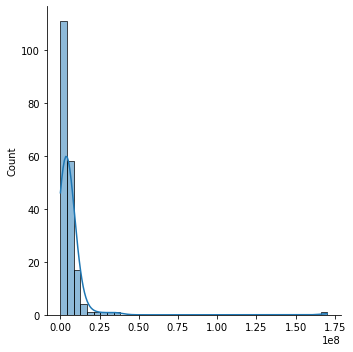



les meilleurs parametres du model: {'lasso__alpha': 148496.82622544636}
, meilleur score: 0.5614055204392224


In [180]:
n_alphas = 100
alpha = np.logspace(-2, 8, n_alphas)
params={'lasso__alpha': alpha}
pre=preprocessor1
model2=regression_model1(pre=pre, model=Lasso(), params=params)
#model2.best_params_, model2.best_score_
print(f"les meilleurs parametres du model: {model2.best_params_}\n, meilleur score: {model2.best_score_}")

* Lasso Aussi obtient de bons resultats avec EnergyStarScore

### 3. Model ElasticNet

In [181]:
model_3=make_pipeline( OneHotEncoder(handle_unknown='ignore'), ElasticNet())
model_3

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('elasticnet', ElasticNet())])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 428639738701408.94, tolerance: 41200939731534.79
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 329522351645728.1, tolerance: 33122050549107.324
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 406704713305592.0, tolerance: 36327023111804.9
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29745467499

RMSE: 6967526.685534875, 
 MAE: 4947134.088543512
Moyenne des erreur:  5957330.387039194
Score: 0.6304836541749512

erreur totale moyenne:  30.127247872039824 



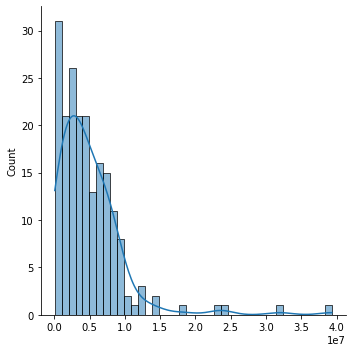




 les meilleurs parametres du model: {'elasticnet__alpha': 100000.0, 'elasticnet__l1_ratio': 1.0},
 meilleur score: 0.5830634935583221


In [182]:
params={'elasticnet__alpha':np.logspace(-5, 5, 10), 
'elasticnet__l1_ratio':np.linspace(0,1, 8)
        }
process=preprocessor
model3=regression_model(pre=process,  model=ElasticNet(), params=params)
print(f"\n les meilleurs parametres du model: {model3.best_params_},\n meilleur score: {model3.best_score_}")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 362344048084421.6, tolerance: 33474134458457.46
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 298197007853216.5, tolerance: 26977772617744.49
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 279105246197780.22, tolerance: 26734064517264.605
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:622: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3283761359

RMSE: 14381289.12324392, 
 MAE: 5704219.182509814
Moyenne des erreur:  10042754.152876867
Score: 0.6146390583298234

erreur totale moyenne:  31.576583194839227 



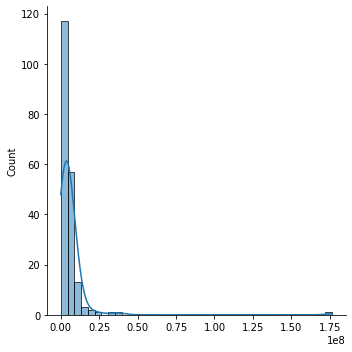




 les meilleurs parametres du model: {'elasticnet__alpha': 100000.0, 'elasticnet__l1_ratio': 1.0},
 meilleur score: 0.5562483191140639


In [183]:
params={'elasticnet__alpha':np.logspace(-5, 5, 10), 
'elasticnet__l1_ratio':np.linspace(0,1, 8)
        }
process=preprocessor1
model3=regression_model1(pre=process,  model=ElasticNet(), params=params)
print(f"\n les meilleurs parametres du model: {model3.best_params_},\n meilleur score: {model3.best_score_}")

* ElasticNet obtient aussi en moyenne de bons resultats avec EnergyStarScore, difference de precision de pres de 0.1

**Les models linéaires obtiennent un meilleur score avec EnergyStarScore**

## Les models non linéaires

### 4. SVR

RMSE: 12433740.669606233, 
 MAE: 6175200.042864243
Moyenne des erreur:  9304470.356235238
Score: -0.17673855525547677

erreur totale moyenne:  31.285554613280443 



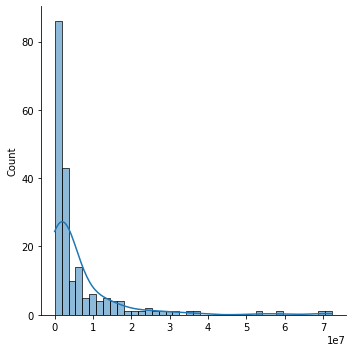



`
 les meilleurs parametres du model: {'svr__C': 1000.0, 'svr__gamma': 0.1},
 meilleur score: -0.0757306303829917


In [184]:
params={'svr__C':np.logspace(-2, 3, 6),
        'svr__gamma': np.logspace(-2, 1, 4)}
pre=preprocessor
model4=regression_model(pre=pre, model=SVR(), params=params)
print(f"`\n les meilleurs parametres du model: {model4.best_params_},\n meilleur score: {model4.best_score_}")

 * Sans EnergyStarScore

RMSE: 23786192.36708056, 
 MAE: 7147860.58394109
Moyenne des erreur:  15467026.475510826
Score: -0.05419733330502807

erreur totale moyenne:  32.582937537385824 



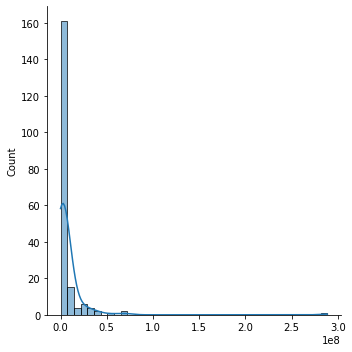



`
 les meilleurs parametres du model: {'svr__C': 1000.0, 'svr__gamma': 0.1},
 meilleur score: -0.07604229463953885


In [185]:
params={'svr__C':np.logspace(-2, 3, 6),
        'svr__gamma': np.logspace(-2, 1, 4)}
pre=preprocessor1
model4=regression_model1(pre=pre, model=SVR(), params=params)
print(f"`\n les meilleurs parametres du model: {model4.best_params_},\n meilleur score: {model4.best_score_}")

* SVR obtient de meme un meilleur resultat en moyenne avec EnergyStarScore

### 5. Ramdom Forest

In [196]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

RMSE: 3529336.9645682927, 
 MAE: 1415262.0173671239
Moyenne des erreur:  2472299.490967708
Score: 0.9051881496161317

erreur totale moyenne:  28.766948220627576 



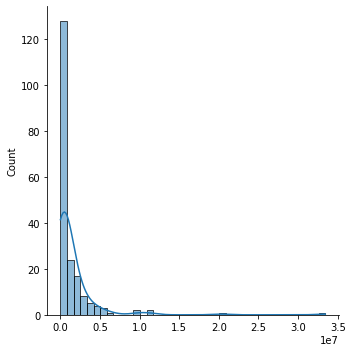



`
 les meilleurs parametres du model: {'randomforestregressor__criterion': 'squared_error', 'randomforestregressor__n_estimators': 300},
 meilleur score: 0.7739650646758411


In [201]:
#max_depth = [5,15,30,45]
#max_depth = [None]
#min_samples_leaf = [1,3,5,10]
#max_features = ['auto', 'sqrt']
n_estimators = [100,200,300]
criterion=["squared_error", "absolute_error", "poisson"]
dic={}
dic['randomforestregressor__n_estimators']=n_estimators
dic["randomforestregressor__criterion"]=criterion
#dic['randomforestregressor__min_samples_leaf']=min_samples_leaf
#dic['randomforestregressor__max_features']=max_features
#dic['randomforestregressor__max_depth']=max_depth
#params = dict(n_estimators=n_estimators,criterion=criterion, min_samples_leaf=min_samples_leaf , max_features=max_features , max_depth=max_depth)

pre=preprocessor
model5=regression_model(pre=pre, model=RandomForestRegressor(), params=dic)
print(f"`\n les meilleurs parametres du model: {model5.best_params_},\n meilleur score: {model5.best_score_}")

* Sans EnergyStarScore

RMSE: 6080703.555285042, 
 MAE: 1614771.324976956
Moyenne des erreur:  3847737.4401309993
Score: 0.931106266261433

erreur totale moyenne:  29.85496865556118 



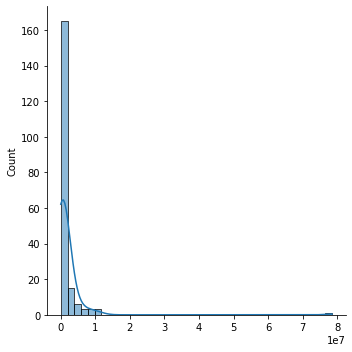



`
 les meilleurs parametres du model: {'randomforestregressor__criterion': 'absolute_error', 'randomforestregressor__n_estimators': 100},
 meilleur score: 0.8512323110519923


In [198]:
pre=preprocessor1

model5=regression_model1(pre=pre, model=RandomForestRegressor(), params=dic)
print(f"`\n les meilleurs parametres du model: {model5.best_params_},\n meilleur score: {model5.best_score_}")

* RandomForest obtient le meilleur score sur le jeu de donnée et aussi fonctionne mieux sans EnergyStarScore. Comme son calcul est couteux, nous allons donc choisir ce modele pour reduire le cout de collecte des données

In [199]:
rf=model5.best_estimator_[-1]
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
col_liste=[]
for i in df.columns:

  if i in df[quan]:
    col_liste.append(list(df.columns).index(i))
col_liste

indices=importances[col_liste]
indices

len(indices)
indices=[float(i) for i in indices]

features = list(X_train[quan].columns)


[1.07026439e-02 1.98056962e-02 0.00000000e+00 2.18070060e-02
 2.45248890e-02 1.53369733e-01 5.92612115e-02 7.89480659e-03
 5.25776740e-01 6.75705338e-02 0.00000000e+00 2.15246702e-04
 3.41921391e-04 1.61489035e-04 4.36505310e-03 4.25990457e-03
 1.79375568e-04 3.75591751e-03 1.19038586e-05 4.69498373e-04
 4.21043853e-04 3.54095778e-03 1.37956899e-05 1.73827560e-04
 5.08576059e-04 9.07792226e-04 3.56740731e-03 1.42486825e-04
 4.43525254e-04 1.20641829e-04 6.45550612e-05 2.04386170e-06
 9.62922589e-07 5.01878885e-05 2.05936734e-06 7.79325061e-06
 4.17189430e-06 7.40428075e-05 4.61600744e-05 5.65928852e-06
 6.00378003e-07 9.53042393e-05 6.10084061e-05 8.60603414e-06
 7.66533329e-05 6.61978734e-06 1.53936297e-05 1.14190256e-05
 1.71517980e-06 1.59281893e-05 1.50986739e-05 5.68323644e-05
 3.52601608e-06 6.73148673e-07 1.73205375e-05 2.60746878e-05
 7.43783780e-05 1.16610501e-05 2.13227824e-05 3.02246669e-06
 1.41452053e-05 1.34497768e-05 3.79368910e-06 6.34444671e-05
 7.69085160e-06 8.044818

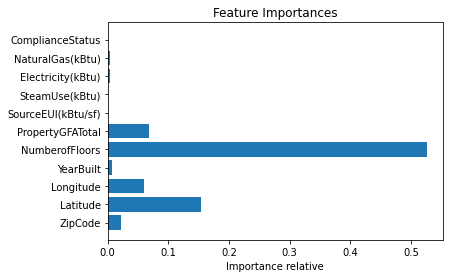

In [200]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), indices)
plt.yticks(range(len(indices)), [features[i] for i in range(len(indices))])
plt.xlabel('Importance relative')
plt.show()

# Explication de l'importance des features

In [188]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 4.9 MB/s 


In [189]:
model5.best_params_

{'randomforestregressor__criterion': 'absolute_error',
 'randomforestregressor__n_estimators': 300}

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import shap
'''explainer= shap.TreeExplainer(model5.best_estimator_[-1])
shap_values = explainer.shap_values(preprocessor.fit_transform(X_train))'''
# Fits the explainer
pro=preprocessor.fit(X_train)
model_i=RandomForestRegressor(criterion="squared_error",max_depth= 45, n_estimators=100 )
model_i.fit(X_train[quan], y_train)
explainer = shap.KernelExplainer(model_i.predict, X_test[quan])

#shap_values = explainer(X_test)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


## Importance Globale

  0%|          | 0/196 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fit

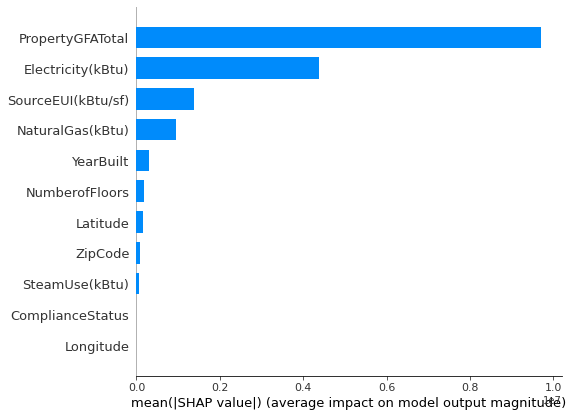

In [191]:
shap_values = explainer.shap_values(X_test[quan])

# visualize the model's dependence on the first feature
shap.summary_plot(
    shap_values, X_test[quan], 
    feature_names=quan, plot_type="bar"
)

## Importance Locale

In [194]:
shap.initjs()
shap_values = explainer.shap_values(X_test[quan].iloc[0])
#print(len(shap_values), df0.iloc[0,:].shape)
shap.force_plot(explainer.expected_value, shap_values,X_test[quan].iloc[0])

X does not have valid feature names, but RandomForestRegressor was fitted with feature names
X does not have valid feature names, but RandomForestRegressor was fitted with feature names


[9.67181718e-03 1.90323714e-02 0.00000000e+00 ... 9.30834241e-05
 1.61188266e-04 9.45512126e-05]


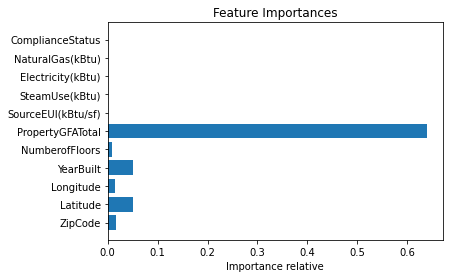

In [195]:
rf=model5.best_estimator_[-1]
print(rf.feature_importances_)
importances = rf.feature_importances_
indices = np.argsort(importances)
col_liste=[]
for i in df.columns:

  if i in df[quan]:
    col_liste.append(list(df.columns).index(i))
col_liste

indices=importances[col_liste]
indices

len(indices)
indices=[float(i) for i in indices]

features = list(X_train[quan].columns)
plt.title('Feature Importances')
plt.barh(range(len(indices)), indices)
plt.yticks(range(len(indices)), [features[i] for i in range(len(indices))])
plt.xlabel('Importance relative')
plt.show()

# Conclusion

* Le meilleur modele à retenir pour la prediction de la consommation en energie est le RandomForest qui obtient un score de pres de 95%  sur ce jeu de données
* En général, la presence de la variable EnergyStarScore ne fait pas varier trop la precision du model de plus de 5% ce qui fait qu'elle n'est pas indispensable.
 Aussi, le RandomForest qui a le meilleur score obtient plus de précision sans l'EnergyStarScore